# 神经网络
产生神经网络的原因在于特征数目太多（如上百万）以至于传统机器学习无法处理。通过一些实验证明：不同功能的脑处理往往可能使用相似的算法。

每一个神经元都可以被认为是一个处理单元/神经核（processing unit/Nucleus），它含有许多输入/树突（input/Dendrite），并且有一个输出/轴突（output/Axon）。

相比于普通逻辑回归，神经网络每一层都提取一些特征，最后通过这些特征来预测结果值。注意：除输出层外，神经网络每一层都加一个偏置单元。

前向计算：$z=\Theta x,a=g(z)$，其中$g$函数是一个激活函数。

## 代价函数
神经网络的代价函数与逻辑回归的基本思想一样，唯一不同的是，对于每一行特征，我们都会给出$K$个预测，然后再利用循环在$K$个预测中选择可能性最高的一个，将其与$y$中的实际数据进行比较。正则化则是对每一层的$\Theta$都做处理。其代价函数如下：

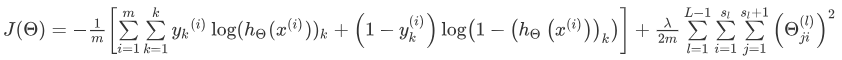

## 反向传播算法(BP)
通过最后一层的结果与实际$y$的差异再层层反传以实现纠正权值的功能。需要明白反向传播算法与梯度下降算法的差异：  
**反向传播是训练神经网络的算法；梯度下降是求最优值的算法**

## 实现

In [4]:
import tensorflow as tf
import numpy as np

# 创建数据
x = np.arange(4, dtype=np.float32).reshape(2, 2)
y = np.array([0, 1], dtype=np.float32).reshape(2, 1)

# 创建权值与偏差
w1 = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1], stddev=1, seed=1))
b1 = tf.Variable(tf.zeros([3]))
b2 = tf.Variable(tf.zeros([1]))

# 得到结果
a = tf.nn.relu(tf.matmul(x, w1)+b1)
y_ = tf.matmul(a, w2) + b2

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_, labels=y, name=None)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) 

with tf.Session() as sess: 
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(100):  
        sess.run(train_op) 

    print(sess.run(w1))
    print(sess.run(w2))

[[-0.8113182   1.5238441   0.06349531]
 [-2.4427042   0.06568832  0.6111631 ]]
[[-0.8113182 ]
 [ 1.5233549 ]
 [-0.17035116]]
